In [1]:
import datetime
import time
current_time = datetime.datetime.now()
print(current_time)
timestamp = str(time.mktime(current_time.timetuple()))

2015-11-25 16:16:02.114935


In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('bmh')
from pycalphad.fitting import build_pymc_model, plot_results
from pycalphad import Database
import pymc
import numpy as np
import glob

input_database = Database('Al-Ni-start.tdb')
# Only fit to FCC_L12 heat capacity data
dataset_names = sorted(glob.glob('FCC_L12*CPM.json'))

FCCBMAGNNI = pymc.Gamma('FCCBMAGNNI', alpha=1, beta=1)
FCCTCALNI0 = pymc.Normal('FCCTCALNI0', mu=0, tau=1./2000**2)
FCCTCALNI1 = pymc.Normal('FCCTCALNI1', mu=0, tau=1./2000**2)
L12UALNI_A = pymc.Normal('L12UALNI_A', mu=0, tau=1./100000**2)
L12UALNI_B = pymc.Normal('L12UALNI_B', mu=0, tau=1./100**2)
params = [FCCBMAGNNI, FCCTCALNI0, FCCTCALNI1, L12UALNI_A, L12UALNI_B]
%time mod, datasets = build_pymc_model(input_database, dataset_names, params)
MDL = pymc.MCMC(mod, db='hdf5', dbname='AlNi-FCC_L12-'+timestamp+'.hdf5', dbcomplevel=4, dbcomplib='bzip2')

CPU times: user 2min 22s, sys: 360 ms, total: 2min 23s
Wall time: 2min 22s


In [4]:
%time MDL.sample(iter=20000, burn=15000, burn_till_tuned=False, thin=2, progress_bar=True)

 [-----------------100%-----------------] 20000 of 20000 complete in 788.5 secCPU times: user 13min 9s, sys: 230 ms, total: 13min 9s
Wall time: 13min 8s


Plotting L12UALNI_B
Plotting FCCTCALNI1
Plotting FCCBMAGNNI
Plotting FCCTCALNI0
Plotting L12UALNI_A


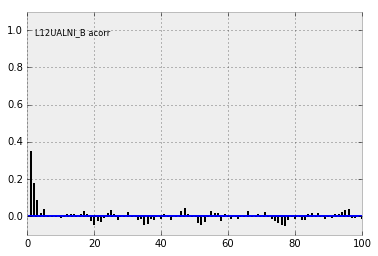

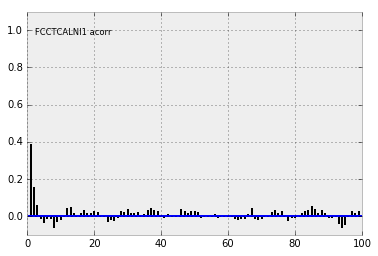

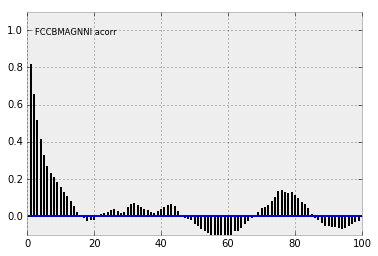

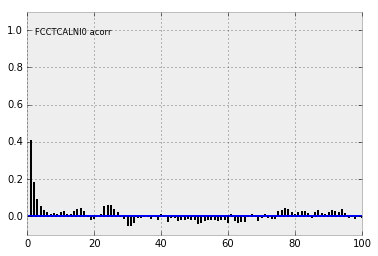

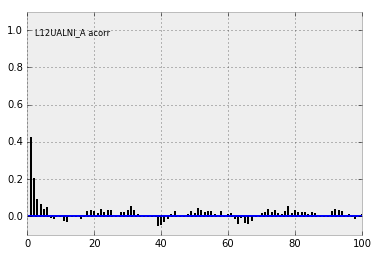

In [5]:
pymc.Matplot.autocorrelation(MDL)

Could not calculate Gelman-Rubin statistics. Requires multiple chains of equal length.


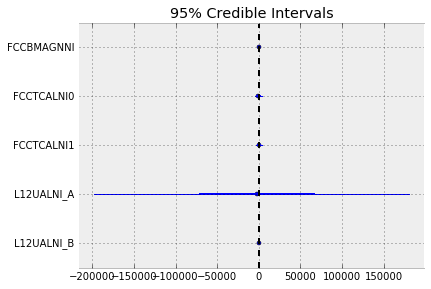

In [6]:
pymc.Matplot.summary_plot(params)

/home/rotis/anaconda/envs/mc/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


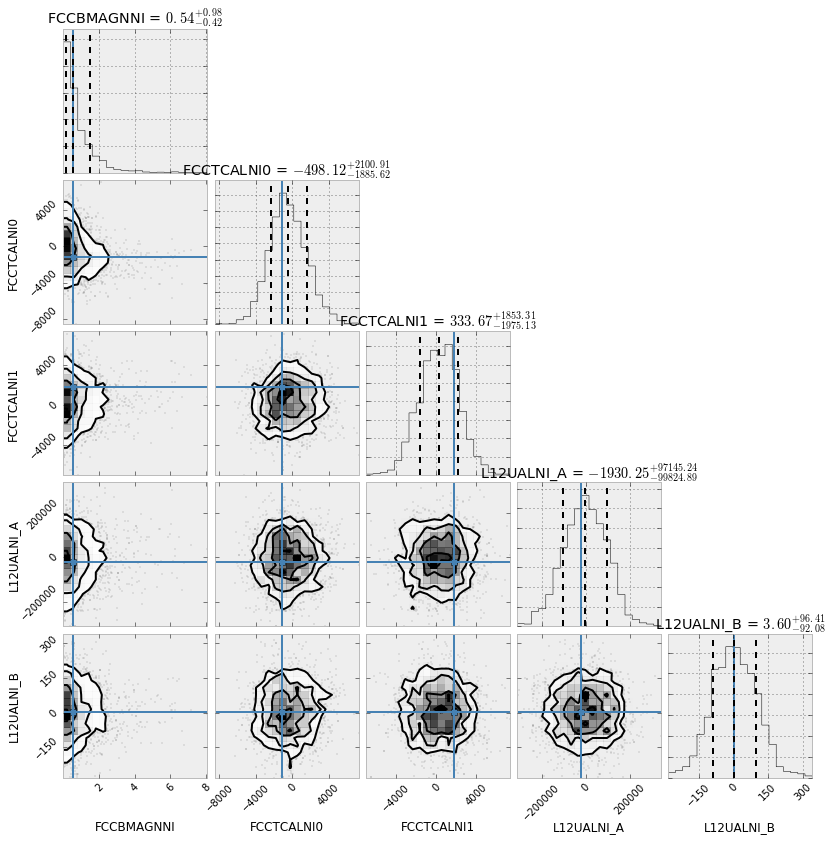

In [7]:
from corner import corner
from itertools import chain
data = np.vstack(chain([i.trace() for i in params])).T
corner(data, labels=[str(i) for i in params],
       quantiles=[0.16, 0.5, 0.84],
       truths=[0.52, -1112, 1745, -22212.8931, 4.39570389],
       show_titles=True, title_args={"fontsize": 40}).show()

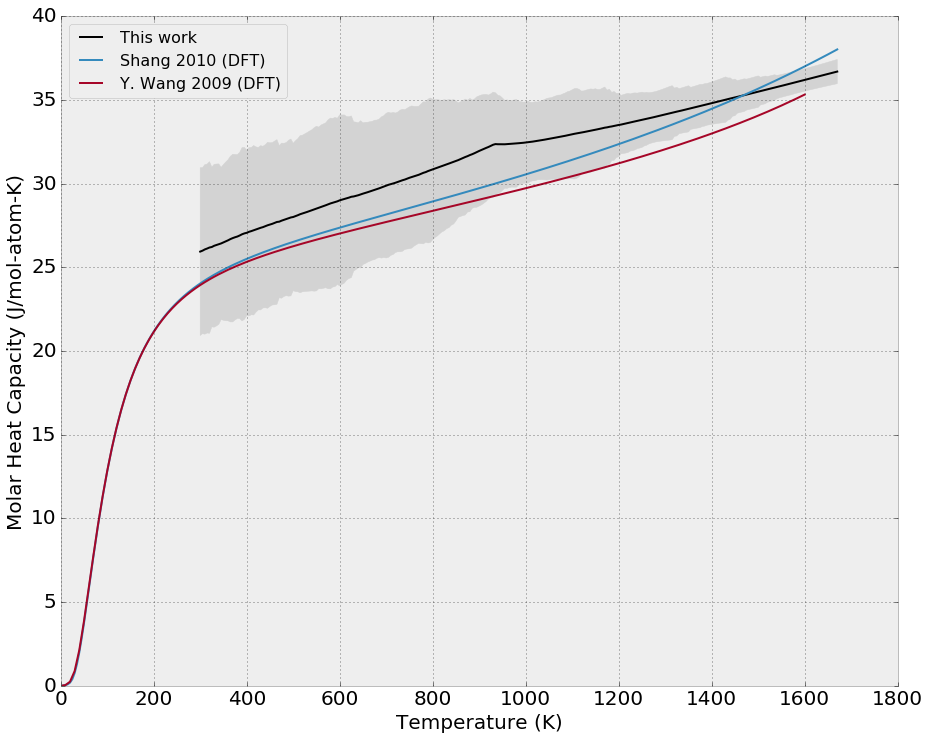

In [8]:
%matplotlib inline
plot_results(datasets, params)

In [9]:
MDL.summary()


L12UALNI_B:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	5.376            96.794           2.755        [-173.335  192.9  ]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	-179.221         -61.735         3.602          71.683        187.202
	

FCCTCALNI1:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	308.998          1969.577         58.049     [-3534.903  4115.402]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	-3503.93         -994.207        338.115        1652.431      4159.938
	

FCCBMAGNNI:
 
	Mean             SD               MC Error        95% HPD interval
	-